# Scraping Job Postings from LinkedIn 

This code was adapted from the following article: <br>
https://maoviola.medium.com/a-complete-guide-to-web-scraping-linkedin-job-postings-ad290fcaa97f

### What data will you be able to get?

##### All jobs from a defined job search. <br>
That search can be limited by any of the given LinkedIn options.<br>

##### Items that are on the job card. <br>
This code will focus on job ID, job titles and company names, but location and date can be pulled as well.

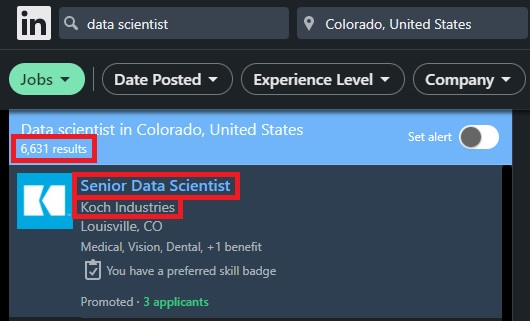

In [2]:
from IPython.display import Image
Image(filename='LIJobCardExample.jpg') 

In [1]:
#Import packages
from selenium import webdriver
import time
import pandas as pd
from bs4 import BeautifulSoup

## importing libraries to plot the wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#Hide Warnings
import warnings
warnings.filterwarnings('ignore')

##### Define the search and copy the url. <br>
Do not be signed-in to LinkedIn for this part. In LinkedIn create the search for the required job postings. This case is focused on all jobs in Rancho Cordova, limited to a 10 mile radius.

In [2]:
# URL for LinkedIn Job search of jobs in Rancho Cordova with 10 mile radius. 
# Past Month
# (Not signed-in search)

# Replace this url with the one for your needed search.

url = 'https://www.linkedin.com/jobs/search?keywords=&location=Rancho%20Cordova%2C%20California%2C%20United%20States&locationId=&geoId=104863738&sortBy=R&f_TPR=r2592000&f_PP=104863738&distance=10&position=1&pageNum=0'

##### Set-up the web driver. <br>

The chromedriver is being used in this case. If you have not previously installed it, you can do so at: <br>
https://chromedriver.chromium.org/downloads

In [17]:
#Set-up chromedriver
wd = webdriver.Chrome(executable_path=r'C:\chromedriver.exe')

#Connect the webdriver to the job search.
wd.get(url)

##### How many job posts are associated with the job seach? <br>
Note: It may go to a log in page. In the future a bypass will be added. However, at the moment you can just re-run the following cell.

In [18]:
#How many jobs are curently available within 10 miles of Rancho Cordova on LinkedIn

no_of_jobs = int(wd.find_element_by_css_selector('h1>span').get_attribute('innerText'))

print('There are', no_of_jobs, 'jobs available within 10 miles of Rancho Cordova on LinkedIn over the past month.')

There are 958 jobs available within 10 miles of Rancho Cordova on LinkedIn over the past month.


##### Show all the jobs. <br>
The following segment of code  will scroll and click 'Show more job' until all jobs are showing.

In [19]:
#Browse all jobs for the search.
i = 2
while i <= int(no_of_jobs/25)+1: 
    #Scroll until hit the see more jobs button.
    wd.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    i = i + 1
    try:
        #Click the see more jobs button and then keep scrolling.
        wd.find_element_by_xpath(f"//button[@aria-label='Load more results']").click()
        time.sleep(20)
    except:
        pass
        time.sleep(20)

##### Create a list of all jobs in the search.

In [20]:
#Create a list of the jobs.
job_lists = wd.find_element_by_class_name('jobs-search__results-list')
jobs = job_lists.find_elements_by_tag_name('li')

In [21]:
#Test that it collected all jobs.
#If it significantly dropped, the sleep.time time may need to be increased to allow:
#More loading time or
#Not set off restrictions for the site.
len(jobs)

950

##### Create arrays for each attribute that is needed.

In [22]:
#Pull basic information from each job.
job_title = []
company_name = []
location = []
date = []
job_link = []
for job in jobs:
    job_title0 = job.find_element_by_css_selector('h3').get_attribute('innerText')
    job_title.append(job_title0)
 
    company_name0 = job.find_element_by_css_selector('h4').get_attribute('innerText')
    company_name.append(company_name0)
 
    date0 = job.find_element_by_css_selector('div>div>time').get_attribute('datetime')
    date.append(date0)
 
    job_link0 = job.find_element_by_css_selector('a').get_attribute('href')
    job_link.append(job_link0)

In [26]:
#See first 5 of each for verification.
print('Job Titles:',job_title[:5])
print(' ')
print('Company Names:',company_name[:5])
print(' ')
print('Date:', date[:5])
print(' ')
print('Job Link:', job_link[:5])

Job ID: [None, None, None, None, None]
 
Job Titles: ['Disease Management Enrollment Representative', 'Patient Advocate', 'A/R Payment Rep II', 'Clerical Supervisor I', 'Accountant']
 
Company Names: ['Centene Corporation', 'Dignity Health', 'Dignity Health', 'Dignity Health', 'Dignity Health']
 
Date: ['2021-11-04', '2021-11-04', '2021-11-04', '2021-11-04', '2021-11-04']
 
Job Link: ['https://www.linkedin.com/jobs/view/disease-management-enrollment-representative-at-centene-corporation-2779826690?refId=coyN%2FKAle4vMnNtx%2BmmqeQ%3D%3D&trackingId=10Rhqc7gtG4tJCcVGmhdKg%3D%3D&position=1&pageNum=0&trk=public_jobs_jserp-result_search-card', 'https://www.linkedin.com/jobs/view/patient-advocate-at-dignity-health-2785310870?refId=coyN%2FKAle4vMnNtx%2BmmqeQ%3D%3D&trackingId=1giweLvL88WMSYvBU2A0gQ%3D%3D&position=2&pageNum=0&trk=public_jobs_jserp-result_search-card', 'https://www.linkedin.com/jobs/view/a-r-payment-rep-ii-at-dignity-health-2785314717?refId=coyN%2FKAle4vMnNtx%2BmmqeQ%3D%3D&tracki

##### Create and save a dataframe of the collected data.

In [28]:
job_card_data = pd.DataFrame({'Date': date,
                              'Company': company_name,
                              'Title': job_title,})

job_card_data.to_csv('LinkedIn_Job_Search.csv', index = False)

In [29]:
job_card_data.head()

,Date,Company,Title
0,2021-11-04,Centene Corporation,Disease Management Enrollment Representative
1,2021-11-04,Dignity Health,Patient Advocate
2,2021-11-04,Dignity Health,A/R Payment Rep II
3,2021-11-04,Dignity Health,Clerical Supervisor I
4,2021-11-04,Dignity Health,Accountant
